# UMAP Explorer

This notebook acts as an exmaple of a UMAP exploration work flow

- Load data (this example uses a csv file)
- Generate data columns
- Embed the UMAP and plot the new xy-coordinates
- Generate clusters using the default Leiden algo
- Plot the UMAP again this time coloring on the clusters
- Generate a xgboost regression model selecting 2 clusters


## Setting Up

- Importing needed packages
- Declare an UMAP explorer object
- Loading data file
  - csv includes both measurement and well id and well conditions
- Generates data columns
- Calling embedding

In [1]:
import explorer as ue

import numpy as np
import pandas as pd

2024-08-06 14:26:54.685593: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-06 14:26:55.237220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
explore = ue.UE()

In [3]:
explore.load_data('../image_umap.csv',filetype='csv')

In [13]:
explore.get_data_columns(print_cols=False, extra=['x',"x", "y","Conc uM"])

In [5]:
explore.embed()


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.


## Plotting

The first plot shows the UMAP colored by the `Condition` column of the treatment

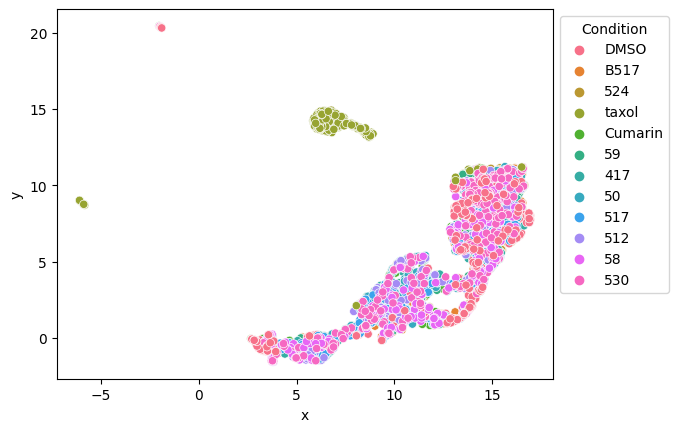

In [6]:
explore.plot(color_on='Condition')

## Clustering

- Call the `cluster` function to use the default `leiden` clustering alogrithm using default parameters
- Plot UMAP colored on generated cluster id

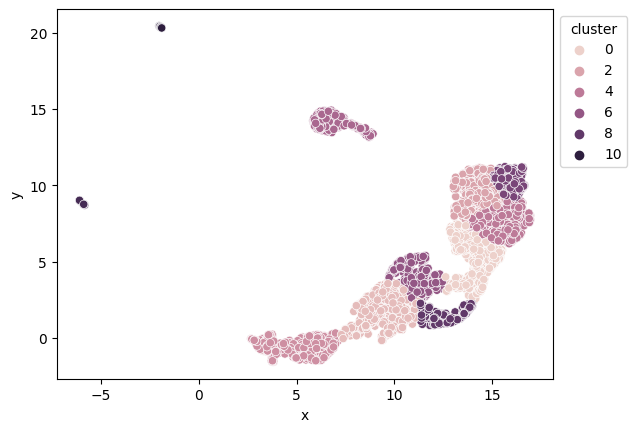

In [7]:
explore.cluster()
explore.plot(color_on='cluster')

## Cluster Exploration

- Select 2 clusters or cluster group (in this example we're using groups of clusters)
- Generate an XGBoost Regression model on the clusters
- `rest` can be used as cluster 2 to do all other clusters than cluster 1

In [8]:
print(explore.cluster_labels)
explore.gen_model([7,9], [0,1,2,3,4,5,6,8,10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Model R2 Score: 0.84
Model MSE: 0.01


In [9]:
explore.gen_model(7,9)

Model R2 Score: 1.00
Model MSE: 0.00



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
explore.gen_model([7,9], 'rest')

Model R2 Score: 0.84
Model MSE: 0.01


## SHAP and Violins

- Call the `get_shaps` function passing the same clusters used in the model
- Pass the top performing column to the `cluster_violins` function to show how the feature differs between clusters

[14:27:12] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


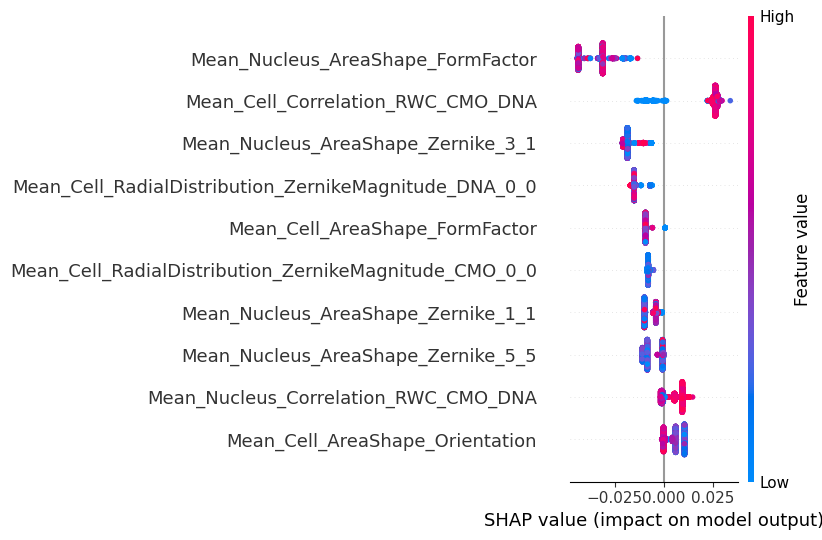

In [11]:
explore.get_shaps([7,9], [0,1,2,3,4,5,6,8,10])

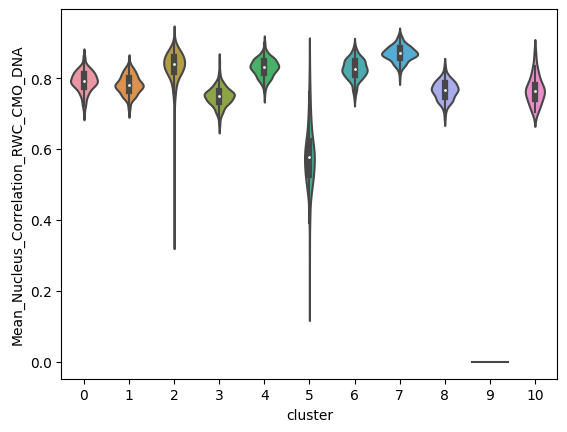

In [12]:
explore.cluster_violins('Mean_Nucleus_Correlation_RWC_CMO_DNA',savefig=True)